In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
teacher_core = pd.read_excel('../data/Teacher_Core_District_Consolidated_2022 (1).xlsx')
teacher_core

,Number,District ID,District,Item,Old Item,Topic,Full Question,Prompt,See Column,Selected,...,2 to 4 hours,4 to 6 hours,6 to 10 hours,More than 10 hours,Less than 30 minutes a day,"30 minutes or more, less than 45 minutes a day","45 minutes or more, less than 49 minutes a day","50 minutes or more, less than 60 minutes a day",60 minutes or more a day,Response Rate
0,1,10,Anderson County,SM_01,NaN,SUMMATIVE MEASURE: School Climate,NaN,NaN,K,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0
1,2,10,Anderson County,TC_01a,TC_01a,School Climate,Please indicate the extent to which you agree ...,There is an atmosphere of trust and mutual res...,K,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0
2,3,10,Anderson County,TC_01c,TC_01c,School Climate,Please indicate the extent to which you agree ...,I am generally satisfied with being a teacher ...,K,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0
3,4,10,Anderson County,TC_01d,TC_01d,School Climate,Please indicate the extent to which you agree ...,I would recommend this school to parents seeki...,K,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0
4,5,10,Anderson County,TC_01e,TC_01e,School Climate,Please indicate the extent to which you agree ...,Our school staff is a learning community in wh...,K,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9647,72,964,Tennessee Schools For The Deaf,TC_23b,NaN,COVID Issues,Which of the listed issues related to COVID-19...,Student grief and trauma related to COVID-19,J,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.0
9648,73,964,Tennessee Schools For The Deaf,TC_23c,NaN,COVID Issues,Which of the listed issues related to COVID-19...,Maintaining and building relationships with st...,J,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.0
9649,74,964,Tennessee Schools For The Deaf,TC_23d,NaN,COVID Issues,Which of the listed issues related to COVID-19...,Students missing crucial services/supports (fr...,J,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.0
9650,75,964,Tennessee Schools For The Deaf,TC_23e,NaN,COVID Issues,Which of the listed issues related to COVID-19...,The long-term economic impacts for me and my s...,J,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.0


In [3]:
teacher_core = pd.DataFrame(teacher_core)
teacher_core

,Number,District ID,District,Item,Old Item,Topic,Full Question,Prompt,See Column,Selected,...,2 to 4 hours,4 to 6 hours,6 to 10 hours,More than 10 hours,Less than 30 minutes a day,"30 minutes or more, less than 45 minutes a day","45 minutes or more, less than 49 minutes a day","50 minutes or more, less than 60 minutes a day",60 minutes or more a day,Response Rate
0,1,10,Anderson County,SM_01,NaN,SUMMATIVE MEASURE: School Climate,NaN,NaN,K,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0
1,2,10,Anderson County,TC_01a,TC_01a,School Climate,Please indicate the extent to which you agree ...,There is an atmosphere of trust and mutual res...,K,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0
2,3,10,Anderson County,TC_01c,TC_01c,School Climate,Please indicate the extent to which you agree ...,I am generally satisfied with being a teacher ...,K,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0
3,4,10,Anderson County,TC_01d,TC_01d,School Climate,Please indicate the extent to which you agree ...,I would recommend this school to parents seeki...,K,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0
4,5,10,Anderson County,TC_01e,TC_01e,School Climate,Please indicate the extent to which you agree ...,Our school staff is a learning community in wh...,K,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9647,72,964,Tennessee Schools For The Deaf,TC_23b,NaN,COVID Issues,Which of the listed issues related to COVID-19...,Student grief and trauma related to COVID-19,J,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.0
9648,73,964,Tennessee Schools For The Deaf,TC_23c,NaN,COVID Issues,Which of the listed issues related to COVID-19...,Maintaining and building relationships with st...,J,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.0
9649,74,964,Tennessee Schools For The Deaf,TC_23d,NaN,COVID Issues,Which of the listed issues related to COVID-19...,Students missing crucial services/supports (fr...,J,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.0
9650,75,964,Tennessee Schools For The Deaf,TC_23e,NaN,COVID Issues,Which of the listed issues related to COVID-19...,The long-term economic impacts for me and my s...,J,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.0


In [4]:
teacher_core_stats = teacher_core[['District', 'Prompt', 'Strongly Disagree', 'Disagree',
                             'Agree', 'Strongly Agree']]
teacher_core_stats.head()

,District,Prompt,Strongly Disagree,Disagree,Agree,Strongly Agree
0,Anderson County,NaN,4.0,11.0,47.0,38.0
1,Anderson County,There is an atmosphere of trust and mutual res...,5.0,8.0,45.0,41.0
2,Anderson County,I am generally satisfied with being a teacher ...,3.0,10.0,38.0,50.0
3,Anderson County,I would recommend this school to parents seeki...,2.0,9.0,41.0,47.0
4,Anderson County,Our school staff is a learning community in wh...,4.0,7.0,46.0,42.0


In [5]:
teacher_core_stats.head(100)

,District,Prompt,Strongly Disagree,Disagree,Agree,Strongly Agree
0,Anderson County,NaN,4.0,11.0,47.0,38.0
1,Anderson County,There is an atmosphere of trust and mutual res...,5.0,8.0,45.0,41.0
2,Anderson County,I am generally satisfied with being a teacher ...,3.0,10.0,38.0,50.0
3,Anderson County,I would recommend this school to parents seeki...,2.0,9.0,41.0,47.0
4,Anderson County,Our school staff is a learning community in wh...,4.0,7.0,46.0,42.0
...,...,...,...,...,...,...
95,Bedford County,NaN,3.0,16.0,54.0,27.0
96,Bedford County,Teachers at my school feel responsible when st...,2.0,20.0,57.0,20.0
97,Bedford County,Teachers at my school feel responsible to help...,2.0,9.0,55.0,34.0
98,Bedford County,Teachers at my school help maintain discipline...,5.0,22.0,49.0,25.0


In [6]:
avg_str_agree = teacher_core_stats[['Strongly Agree', 'District']]
avg_str_agree

,Strongly Agree,District
0,38.0,Anderson County
1,41.0,Anderson County
2,50.0,Anderson County
3,47.0,Anderson County
4,42.0,Anderson County
...,...,...
9647,NaN,Tennessee Schools For The Deaf
9648,NaN,Tennessee Schools For The Deaf
9649,NaN,Tennessee Schools For The Deaf
9650,NaN,Tennessee Schools For The Deaf


In [7]:
avg_str_agree.dtypes

Strongly Agree    float64
District           object
dtype: object

In [8]:
avg_str_agree = avg_str_agree.loc[(avg_str_agree['Strongly Agree'] > 1)]
avg_str_agree

,Strongly Agree,District
0,38.0,Anderson County
1,41.0,Anderson County
2,50.0,Anderson County
3,47.0,Anderson County
4,42.0,Anderson County
...,...,...
9603,24.0,Tennessee Schools For The Deaf
9607,3.0,Tennessee Schools For The Deaf
9608,9.0,Tennessee Schools For The Deaf
9609,3.0,Tennessee Schools For The Deaf


In [9]:
avg_str_agree.columns = ['per_strongly_agree', 'district']
avg_str_agree

,per_strongly_agree,district
0,38.0,Anderson County
1,41.0,Anderson County
2,50.0,Anderson County
3,47.0,Anderson County
4,42.0,Anderson County
...,...,...
9603,24.0,Tennessee Schools For The Deaf
9607,3.0,Tennessee Schools For The Deaf
9608,9.0,Tennessee Schools For The Deaf
9609,3.0,Tennessee Schools For The Deaf


In [10]:
avg_str_agree.describe()

,per_strongly_agree
count,4060.000000
mean,29.197044
std,11.341486
min,2.000000
25%,21.000000
50%,29.000000
75%,36.000000
max,80.000000


In [11]:
avg_str_agree_dist = avg_str_agree.groupby('district').mean()

avg_str_agree_dist = avg_str_agree_dist.reset_index()

In [12]:
avg_str_agree_dist = avg_str_agree_dist.sort_values('per_strongly_agree', ascending = False)

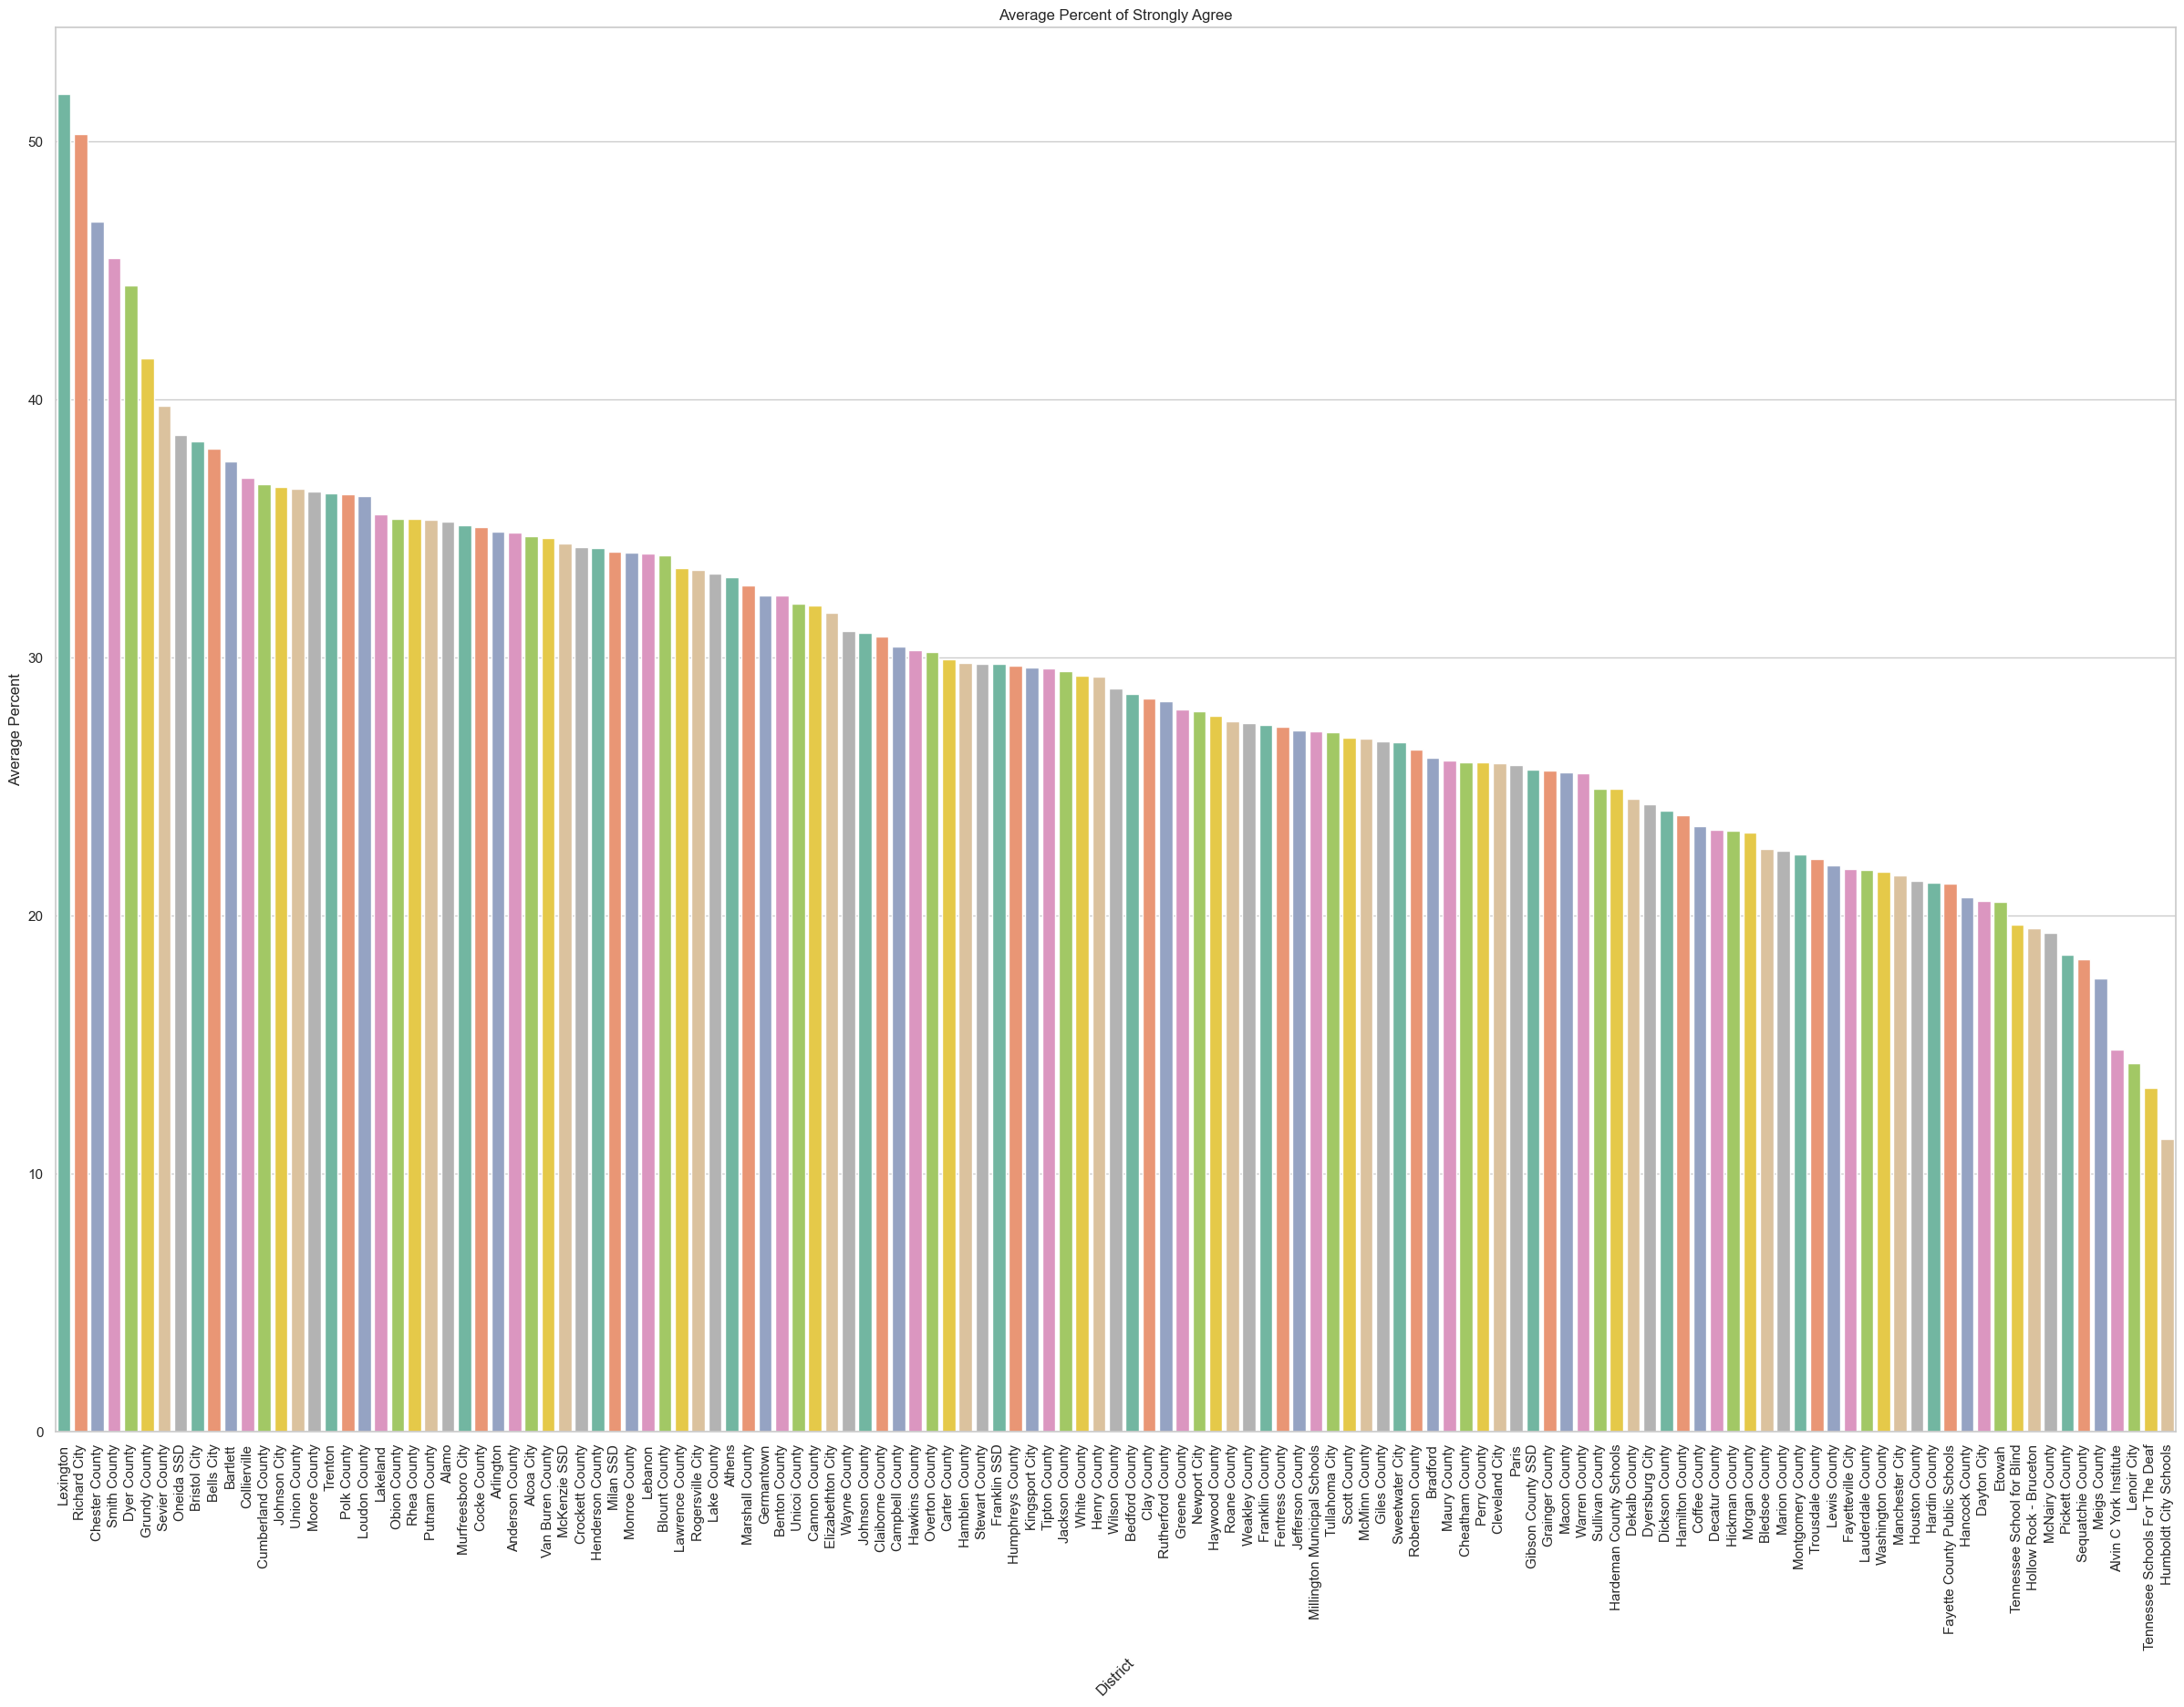

In [13]:
plt.figure(figsize = (30, 20))                              
sns.set(style="whitegrid")                                  
sns.barplot(x = 'district', 
            y = 'per_strongly_agree', 
            data = avg_str_agree_dist, 
            palette = 'Set2')
plt.xlabel('District', rotation = 45)                                              
plt.ylabel('Average Percent')                                              
plt.title('Average Percent of Strongly Agree')
plt.xticks(rotation=90);

In [14]:
top_avg_str_agree = avg_str_agree_dist.head(24)
top_avg_str_agree = top_avg_str_agree.reset_index()
top_avg_str_agree

,index,district,per_strongly_agree
0,72,Lexington,51.81250
1,100,Richard City,50.25000
2,18,Chester County,46.87500
3,108,Smith County,45.46875
4,31,Dyer County,44.40625
5,45,Grundy County,41.56250
6,107,Sevier County,39.75000
7,92,Oneida SSD,38.62500
8,13,Bristol City,38.37500
9,8,Bells City,38.09375


In [15]:
avg_str_dis = teacher_core_stats[['Strongly Disagree', 'District']]
avg_str_dis

,Strongly Disagree,District
0,4.0,Anderson County
1,5.0,Anderson County
2,3.0,Anderson County
3,2.0,Anderson County
4,4.0,Anderson County
...,...,...
9647,NaN,Tennessee Schools For The Deaf
9648,NaN,Tennessee Schools For The Deaf
9649,NaN,Tennessee Schools For The Deaf
9650,NaN,Tennessee Schools For The Deaf


In [16]:
avg_str_dis.dtypes

Strongly Disagree    float64
District              object
dtype: object

In [17]:
avg_str_dis = avg_str_dis.loc[(avg_str_dis['Strongly Disagree'] > 1)]
avg_str_dis

,Strongly Disagree,District
0,4.0,Anderson County
1,5.0,Anderson County
2,3.0,Anderson County
3,2.0,Anderson County
4,4.0,Anderson County
...,...,...
9602,3.0,Tennessee Schools For The Deaf
9607,12.0,Tennessee Schools For The Deaf
9608,6.0,Tennessee Schools For The Deaf
9609,15.0,Tennessee Schools For The Deaf


In [18]:
avg_str_dis.columns = ['per_strongly_dis', 'district']
avg_str_dis

,per_strongly_dis,district
0,4.0,Anderson County
1,5.0,Anderson County
2,3.0,Anderson County
3,2.0,Anderson County
4,4.0,Anderson County
...,...,...
9602,3.0,Tennessee Schools For The Deaf
9607,12.0,Tennessee Schools For The Deaf
9608,6.0,Tennessee Schools For The Deaf
9609,15.0,Tennessee Schools For The Deaf


In [19]:
avg_str_dis_dist = avg_str_dis.groupby('district').mean()

avg_str_dis_dist = avg_str_dis_dist.reset_index()

In [20]:
avg_str_dis_dist = avg_str_dis_dist.sort_values('per_strongly_dis', ascending = False)

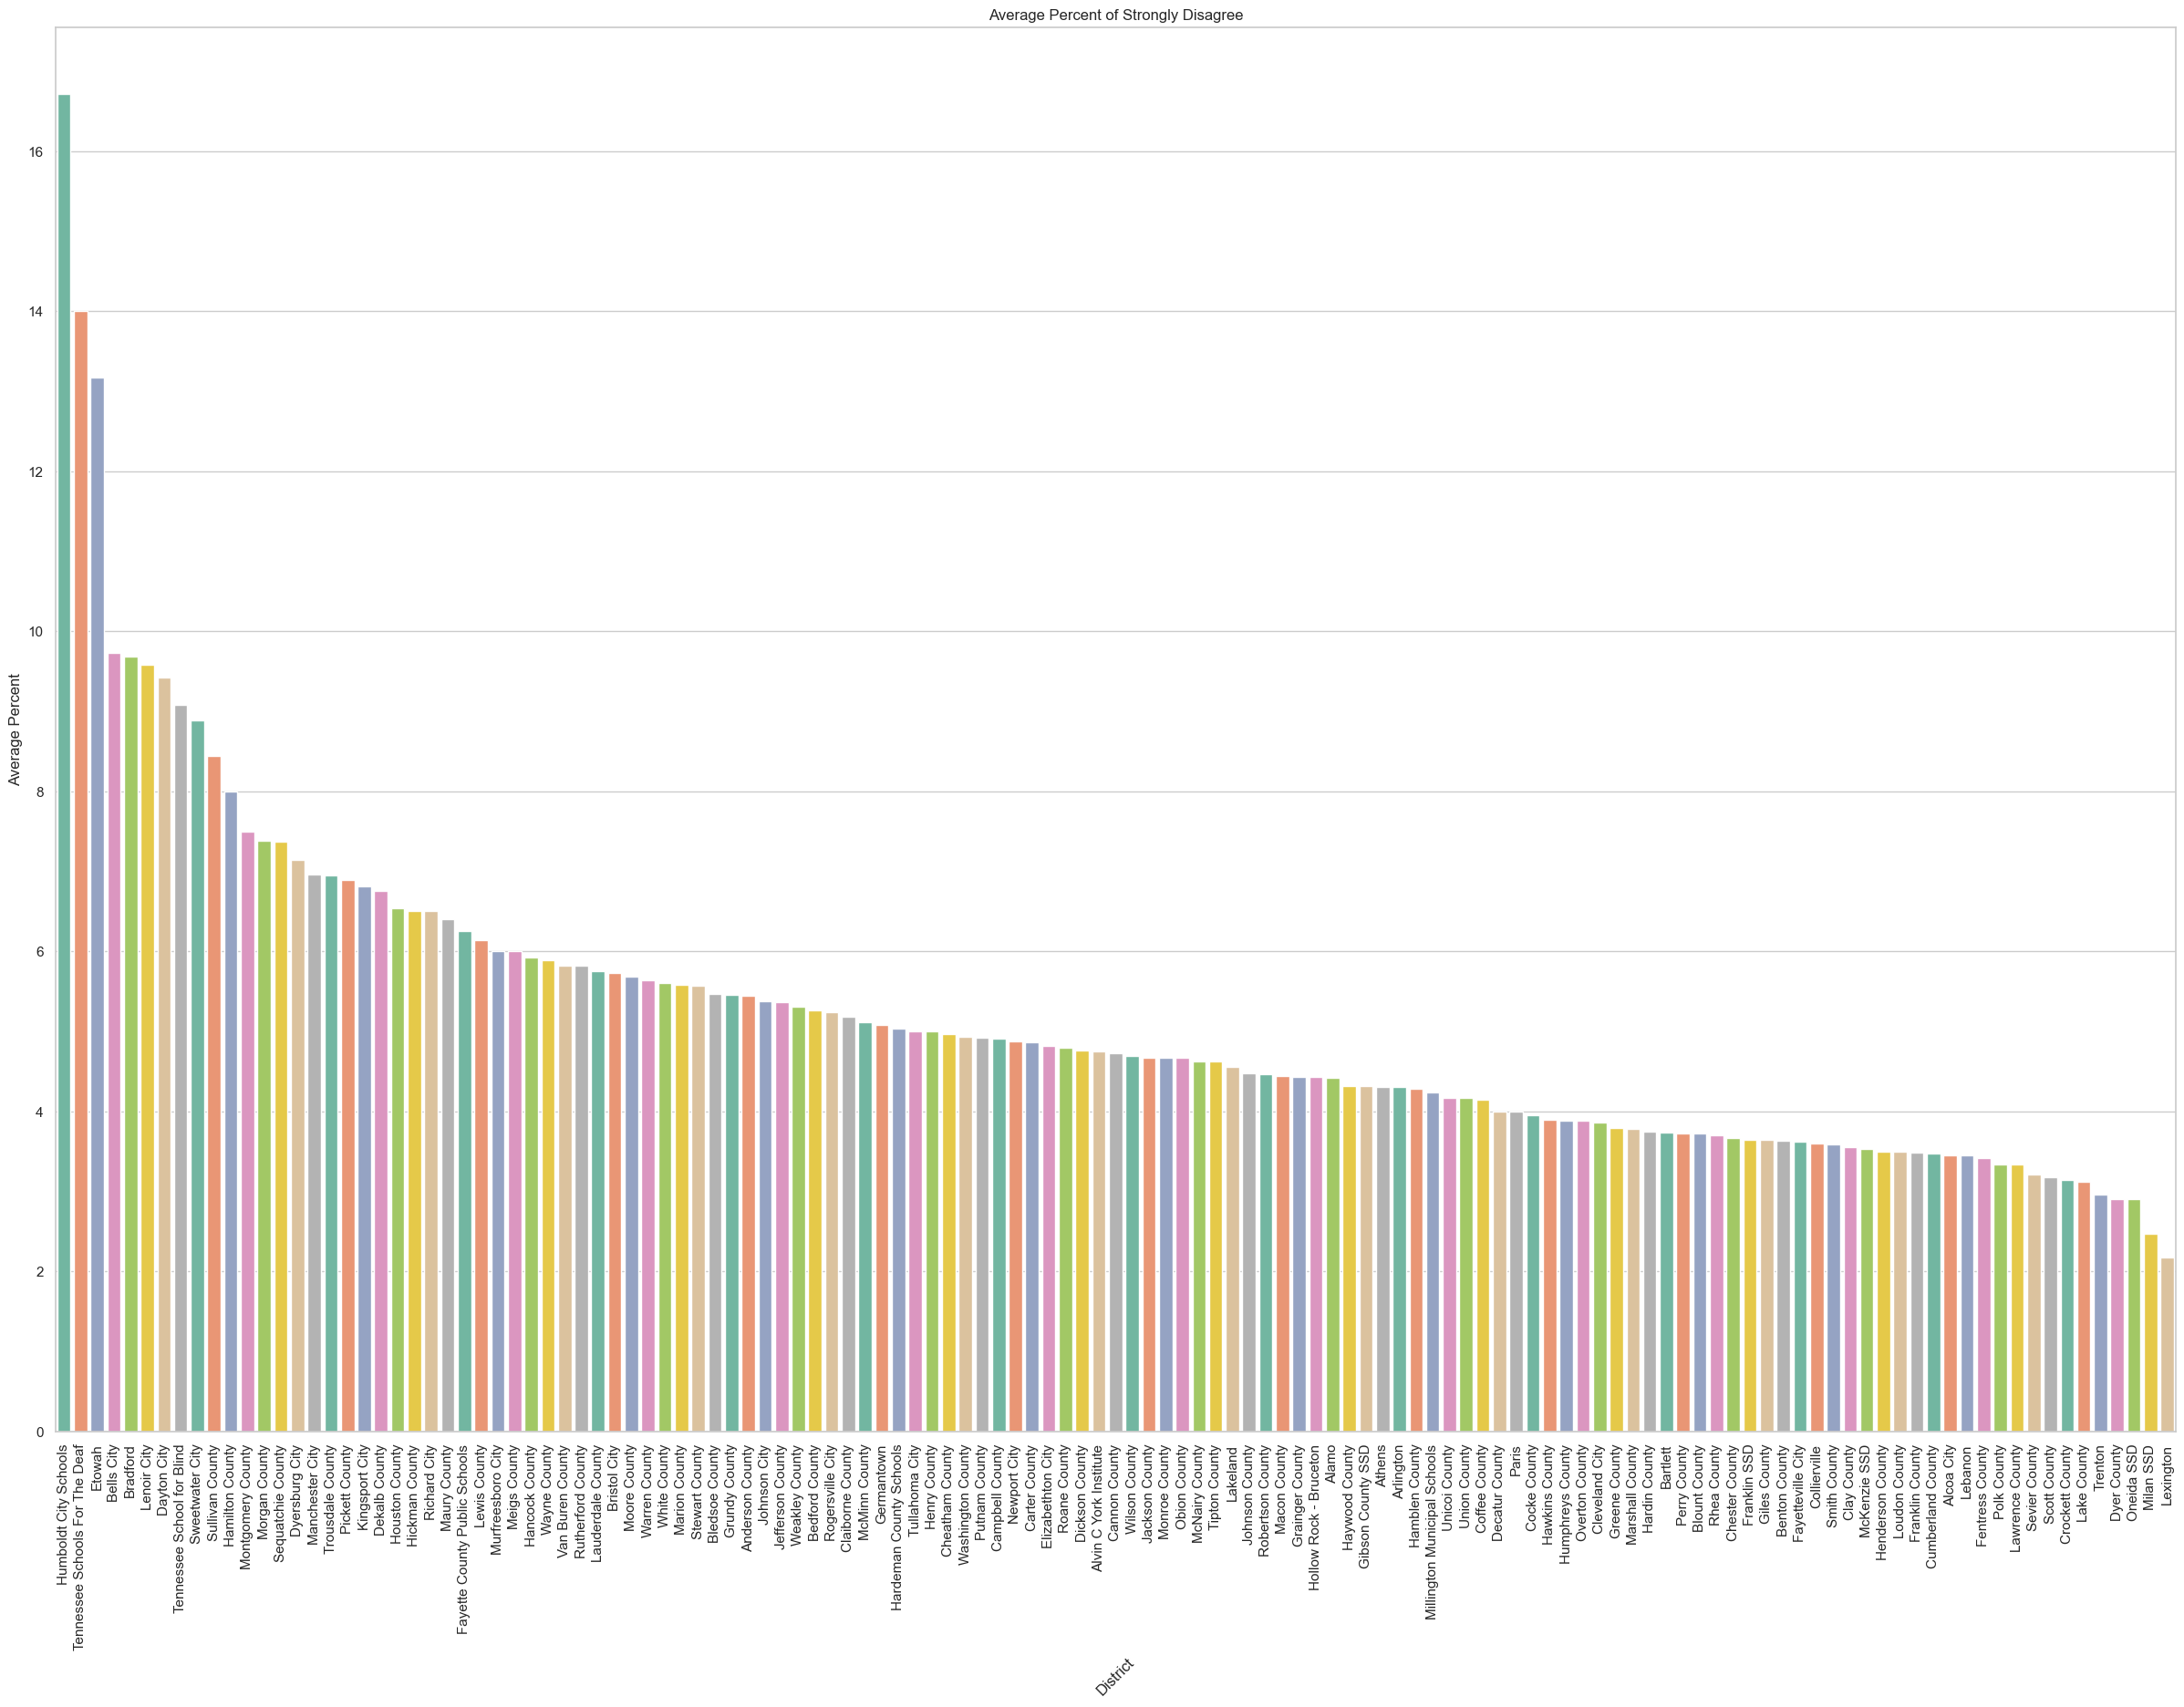

In [21]:
plt.figure(figsize = (30, 20))                              
sns.set(style="whitegrid")                                  
sns.barplot(x = 'district', 
            y = 'per_strongly_dis', 
            data = avg_str_dis_dist, 
            palette = 'Set2')
plt.xlabel('District', rotation = 45)                                              
plt.ylabel('Average Percent')                                              
plt.title('Average Percent of Strongly Disagree')
plt.xticks(rotation=90);

In [22]:
top_str_dis = avg_str_dis_dist.head(24)
top_str_dis

,district,per_strongly_dis
58,Humboldt City Schools,16.709677
113,Tennessee Schools For The Deaf,14.000000
34,Etowah,13.173913
8,Bells City,9.727273
12,Bradford,9.684211
70,Lenoir City,9.583333
27,Dayton City,9.416667
112,Tennessee School for Blind,9.076923
111,Sweetwater City,8.884615
110,Sullivan County,8.444444


In [23]:
scores = pd.read_excel('../data/district_assessment_file_suppressed_upd32323.xlsx')
scores

,year,system,system_name,test,subject,grade,student_group,participation_rate,enrolled,tested,valid_tests,n_below,n_approaching,n_met_expectations,n_exceeded_expectations,pct_below,pct_approaching,pct_met_expectations,pct_exceeded_expectations,pct_met_exceeded
0,2022,10,Anderson County,EOC,Algebra I,10,All Students,99,79,78,77,**,**,**,**,**,**,**,**,1.3
1,2022,10,Anderson County,EOC,Algebra I,10,American Indian or Alaska Native,*,1,1,1,*,*,*,*,*,*,*,*,*
2,2022,10,Anderson County,EOC,Algebra I,10,Black or African American,*,2,2,2,*,*,*,*,*,*,*,*,*
3,2022,10,Anderson County,EOC,Algebra I,10,Black/Hispanic/Native American,*,10,10,9,*,*,*,*,*,*,*,*,*
4,2022,10,Anderson County,EOC,Algebra I,10,Economically Disadvantaged,97,34,33,33,**,**,**,**,**,**,**,**,**
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167626,2022,987,Tennessee Public Charter School Commission,EOC,US History,All Grades,Non-English Learners/Transitional 1-4,99,77,76,76,**,**,**,**,**,**,**,**,6.6
167627,2022,987,Tennessee Public Charter School Commission,EOC,US History,All Grades,Non-Students with Disabilities,99,82,81,78,**,**,**,**,**,**,**,**,7.7
167628,2022,987,Tennessee Public Charter School Commission,EOC,US History,All Grades,Students with Disabilities,*,7,7,7,*,*,*,*,*,*,*,*,*
167629,2022,987,Tennessee Public Charter School Commission,EOC,US History,All Grades,Super Subgroup,99,85,84,81,**,**,**,**,**,**,**,**,6.2


In [24]:
dist_scores_percent = scores.loc[(scores.grade == 'All Grades')]
dist_scores_percent

,year,system,system_name,test,subject,grade,student_group,participation_rate,enrolled,tested,valid_tests,n_below,n_approaching,n_met_expectations,n_exceeded_expectations,pct_below,pct_approaching,pct_met_expectations,pct_exceeded_expectations,pct_met_exceeded
69,2022,10,Anderson County,EOC,Algebra I,All Grades,All Students,99,633,626,616,322,140,133,21,52.3,22.7,21.6,3.4,25
70,2022,10,Anderson County,EOC,Algebra I,All Grades,American Indian or Alaska Native,*,3,3,3,*,*,*,*,*,*,*,*,*
71,2022,10,Anderson County,EOC,Algebra I,All Grades,Asian,*,9,9,9,*,*,*,*,*,*,*,*,*
72,2022,10,Anderson County,EOC,Algebra I,All Grades,Black or African American,100,21,21,21,**,**,**,**,**,**,**,**,9.5
73,2022,10,Anderson County,EOC,Algebra I,All Grades,Black/Hispanic/Native American,96,52,50,40,26,8,4,2,65,20,10,5,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167626,2022,987,Tennessee Public Charter School Commission,EOC,US History,All Grades,Non-English Learners/Transitional 1-4,99,77,76,76,**,**,**,**,**,**,**,**,6.6
167627,2022,987,Tennessee Public Charter School Commission,EOC,US History,All Grades,Non-Students with Disabilities,99,82,81,78,**,**,**,**,**,**,**,**,7.7
167628,2022,987,Tennessee Public Charter School Commission,EOC,US History,All Grades,Students with Disabilities,*,7,7,7,*,*,*,*,*,*,*,*,*
167629,2022,987,Tennessee Public Charter School Commission,EOC,US History,All Grades,Super Subgroup,99,85,84,81,**,**,**,**,**,**,**,**,6.2


In [25]:
dist_scores_percent = dist_scores_percent.loc[(dist_scores_percent.student_group == 'All Students')]
dist_scores_percent

,year,system,system_name,test,subject,grade,student_group,participation_rate,enrolled,tested,valid_tests,n_below,n_approaching,n_met_expectations,n_exceeded_expectations,pct_below,pct_approaching,pct_met_expectations,pct_exceeded_expectations,pct_met_exceeded
69,2022,10,Anderson County,EOC,Algebra I,All Grades,All Students,99,633,626,616,322,140,133,21,52.3,22.7,21.6,3.4,25
155,2022,10,Anderson County,EOC,Algebra II,All Grades,All Students,98,472,463,463,186,126,137,14,40.2,27.2,29.6,3,32.6
249,2022,10,Anderson County,EOC,Biology I,All Grades,All Students,99,545,537,535,114,204,194,23,21.3,38.1,36.3,4.3,40.6
250,2022,10,Anderson County,MSAA/Alt-Science/Social Studies,Biology I,All Grades,All Students,*,8,8,8,*,*,*,*,*,*,*,*,*
490,2022,10,Anderson County,MSAA/Alt-Science/Social Studies,ELA,All Grades,All Students,85,53,45,45,12,7,18,8,26.6,15.6,40,17.8,57.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167442,2022,987,Tennessee Public Charter School Commission,MSAA/Alt-Science/Social Studies,Science,All Grades,All Students,*,2,2,2,*,*,*,*,*,*,*,*,*
167443,2022,987,Tennessee Public Charter School Commission,TNReady,Science,All Grades,All Students,99,634,629,620,134,290,182,14,21.5,46.8,29.4,2.3,31.6
167532,2022,987,Tennessee Public Charter School Commission,MSAA/Alt-Science/Social Studies,Social Studies,All Grades,All Students,*,2,2,2,*,*,*,*,*,*,*,*,*
167533,2022,987,Tennessee Public Charter School Commission,TNReady,Social Studies,All Grades,All Students,100,259,258,256,**,**,**,**,**,**,**,**,29.7


In [26]:
dist_scores_percent = dist_scores_percent.loc[(dist_scores_percent.subject == 'ELA')|(dist_scores_percent.subject == 'Math')]
dist_scores_percent

,year,system,system_name,test,subject,grade,student_group,participation_rate,enrolled,tested,valid_tests,n_below,n_approaching,n_met_expectations,n_exceeded_expectations,pct_below,pct_approaching,pct_met_expectations,pct_exceeded_expectations,pct_met_exceeded
490,2022,10,Anderson County,MSAA/Alt-Science/Social Studies,ELA,All Grades,All Students,85,53,45,45,12,7,18,8,26.6,15.6,40,17.8,57.8
491,2022,10,Anderson County,TNReady,ELA,All Grades,All Students,98,2731,2674,2667,725,1148,639,155,27.2,43,24,5.8,29.8
930,2022,10,Anderson County,MSAA/Alt-Science/Social Studies,Math,All Grades,All Students,85,53,45,45,6,14,23,2,13.4,31.1,51.1,4.4,55.6
931,2022,10,Anderson County,TNReady,Math,All Grades,All Students,98,2611,2551,2544,886,941,548,169,34.9,37,21.5,6.6,28.2
1451,2022,11,Clinton,MSAA/Alt-Science/Social Studies,ELA,All Grades,All Students,*,2,2,2,*,*,*,*,*,*,*,*,*
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166107,2022,985,Achievement School District,TNReady,Math,All Grades,All Students,96,4824,4616,4551,**,**,**,**,**,**,**,**,6.1
166941,2022,987,Tennessee Public Charter School Commission,MSAA/Alt-Science/Social Studies,ELA,All Grades,All Students,*,4,4,4,*,*,*,*,*,*,*,*,*
166942,2022,987,Tennessee Public Charter School Commission,TNReady,ELA,All Grades,All Students,99,634,628,620,147,259,178,36,23.7,41.8,28.7,5.8,34.5
167295,2022,987,Tennessee Public Charter School Commission,MSAA/Alt-Science/Social Studies,Math,All Grades,All Students,*,4,4,4,*,*,*,*,*,*,*,*,*


In [27]:
dist_scores_percent = dist_scores_percent.loc[(dist_scores_percent.test == 'TNReady')]
dist_scores_percent

,year,system,system_name,test,subject,grade,student_group,participation_rate,enrolled,tested,valid_tests,n_below,n_approaching,n_met_expectations,n_exceeded_expectations,pct_below,pct_approaching,pct_met_expectations,pct_exceeded_expectations,pct_met_exceeded
491,2022,10,Anderson County,TNReady,ELA,All Grades,All Students,98,2731,2674,2667,725,1148,639,155,27.2,43,24,5.8,29.8
931,2022,10,Anderson County,TNReady,Math,All Grades,All Students,98,2611,2551,2544,886,941,548,169,34.9,37,21.5,6.6,28.2
1452,2022,11,Clinton,TNReady,ELA,All Grades,All Students,99,504,501,497,76,174,167,80,15.3,35,33.6,16.1,49.7
1565,2022,11,Clinton,TNReady,Math,All Grades,All Students,98,504,496,492,92,160,180,60,18.7,32.5,36.6,12.2,48.8
2259,2022,12,Oak Ridge,TNReady,ELA,All Grades,All Students,98,2050,2011,2004,338,795,648,223,16.9,39.7,32.3,11.1,43.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165084,2022,970,Department Of Children's Services Education Di...,TNReady,Math,All Grades,All Students,*,2,0,0,*,*,*,*,*,*,*,*,*
165618,2022,985,Achievement School District,TNReady,ELA,All Grades,All Students,96,4837,4621,4557,2553,1604,353,47,56.1,35.2,7.7,1,8.8
166107,2022,985,Achievement School District,TNReady,Math,All Grades,All Students,96,4824,4616,4551,**,**,**,**,**,**,**,**,6.1
166942,2022,987,Tennessee Public Charter School Commission,TNReady,ELA,All Grades,All Students,99,634,628,620,147,259,178,36,23.7,41.8,28.7,5.8,34.5


In [28]:
dist_scores_percent = dist_scores_percent[['system_name', 'subject', 'pct_below', 'pct_approaching', 'pct_met_expectations', 'pct_exceeded_expectations']]

In [29]:
dist_scores_percent

,system_name,subject,pct_below,pct_approaching,pct_met_expectations,pct_exceeded_expectations
491,Anderson County,ELA,27.2,43,24,5.8
931,Anderson County,Math,34.9,37,21.5,6.6
1452,Clinton,ELA,15.3,35,33.6,16.1
1565,Clinton,Math,18.7,32.5,36.6,12.2
2259,Oak Ridge,ELA,16.9,39.7,32.3,11.1
...,...,...,...,...,...,...
165084,Department Of Children's Services Education Di...,Math,*,*,*,*
165618,Achievement School District,ELA,56.1,35.2,7.7,1
166107,Achievement School District,Math,**,**,**,**
166942,Tennessee Public Charter School Commission,ELA,23.7,41.8,28.7,5.8


In [30]:
dist_scores_percent = dist_scores_percent.rename (columns = {'system_name':'district'})
dist_scores_percent

,district,subject,pct_below,pct_approaching,pct_met_expectations,pct_exceeded_expectations
491,Anderson County,ELA,27.2,43,24,5.8
931,Anderson County,Math,34.9,37,21.5,6.6
1452,Clinton,ELA,15.3,35,33.6,16.1
1565,Clinton,Math,18.7,32.5,36.6,12.2
2259,Oak Ridge,ELA,16.9,39.7,32.3,11.1
...,...,...,...,...,...,...
165084,Department Of Children's Services Education Di...,Math,*,*,*,*
165618,Achievement School District,ELA,56.1,35.2,7.7,1
166107,Achievement School District,Math,**,**,**,**
166942,Tennessee Public Charter School Commission,ELA,23.7,41.8,28.7,5.8


In [31]:
top_sat_scores = pd.merge(top_avg_str_agree, dist_scores_percent, on = 'district', how = 'left').dropna()
top_sat_scores

,index,district,per_strongly_agree,subject,pct_below,pct_approaching,pct_met_expectations,pct_exceeded_expectations
0,72,Lexington,51.81250,ELA,17.3,45,30.3,7.4
1,72,Lexington,51.81250,Math,16.6,40.6,33.1,9.7
2,100,Richard City,50.25000,ELA,31.5,45.3,20.9,2.3
3,100,Richard City,50.25000,Math,40.6,41.9,12.8,4.7
4,18,Chester County,46.87500,ELA,15.6,40.8,34.1,9.5
5,18,Chester County,46.87500,Math,17.1,33.5,35.8,13.6
6,108,Smith County,45.46875,ELA,15.9,43.7,32.8,7.6
7,108,Smith County,45.46875,Math,21.2,39.3,30.8,8.7
8,31,Dyer County,44.40625,ELA,17.8,42.2,31.7,8.3
9,31,Dyer County,44.40625,Math,21.9,36.5,30.9,10.7


In [32]:
top_sat_scores.to_csv('../data/top_sat_scores.csv')

In [33]:
top_dis_scores = pd.merge(top_str_dis, dist_scores_percent, on = 'district', how = 'left').dropna()
top_dis_scores

,district,per_strongly_dis,subject,pct_below,pct_approaching,pct_met_expectations,pct_exceeded_expectations
0,Humboldt City Schools,16.709677,ELA,52.1,35.7,10.9,1.3
1,Humboldt City Schools,16.709677,Math,61,29.8,7.9,1.3
3,Etowah,13.173913,ELA,20.7,45.2,26.9,7.2
4,Etowah,13.173913,Math,24.5,40.4,29.3,5.8
6,Bradford,9.684211,ELA,14.6,40.1,36.8,8.5
7,Bradford,9.684211,Math,22.1,39.7,27.2,11
8,Lenoir City,9.583333,ELA,28.2,45.5,22.2,4.1
9,Lenoir City,9.583333,Math,30.2,37.2,25.3,7.3
11,Tennessee School for Blind,9.076923,ELA,50,38.5,7.7,3.8
12,Tennessee School for Blind,9.076923,Math,**,**,**,**


In [34]:
top_dis_scores.to_csv('../data/top_dis_scores.csv')

In [45]:
top_sat_and_dis = pd.concat([top_sat_scores, top_dis_scores]).reset_index()
top_sat_and_dis = top_sat_and_dis.drop(columns=['index', 'level_0'])

In [46]:
top_sat_and_dis.to_csv('../data/top_sat_and_dis.csv')

In [47]:
top_sat_and_dis.fillna(0, inplace=True)
top_sat_and_dis

,district,per_strongly_agree,subject,pct_below,pct_approaching,pct_met_expectations,pct_exceeded_expectations,per_strongly_dis
0,Lexington,51.8125,ELA,17.3,45,30.3,7.4,0.000000
1,Lexington,51.8125,Math,16.6,40.6,33.1,9.7,0.000000
2,Richard City,50.2500,ELA,31.5,45.3,20.9,2.3,0.000000
3,Richard City,50.2500,Math,40.6,41.9,12.8,4.7,0.000000
4,Chester County,46.8750,ELA,15.6,40.8,34.1,9.5,0.000000
...,...,...,...,...,...,...,...,...
67,Hickman County,0.0000,Math,33.1,41.2,20.5,5.2,6.500000
68,Richard City,0.0000,ELA,31.5,45.3,20.9,2.3,6.500000
69,Richard City,0.0000,Math,40.6,41.9,12.8,4.7,6.500000
70,Maury County,0.0000,ELA,33,40.6,22,4.4,6.407407


In [48]:
for index, row in top_sat_and_dis.iterrows():
    if row.per_strongly_agree != 0 :
        top_sat_and_dis.loc[index, 'sat_or_dis'] =  'Satisfied'
    else:
        top_sat_and_dis.loc[index, 'sat_or_dis'] = 'Dissatisfied'
   
 

In [49]:
top_sat_and_dis

,district,per_strongly_agree,subject,pct_below,pct_approaching,pct_met_expectations,pct_exceeded_expectations,per_strongly_dis,sat_or_dis
0,Lexington,51.8125,ELA,17.3,45,30.3,7.4,0.000000,Satisfied
1,Lexington,51.8125,Math,16.6,40.6,33.1,9.7,0.000000,Satisfied
2,Richard City,50.2500,ELA,31.5,45.3,20.9,2.3,0.000000,Satisfied
3,Richard City,50.2500,Math,40.6,41.9,12.8,4.7,0.000000,Satisfied
4,Chester County,46.8750,ELA,15.6,40.8,34.1,9.5,0.000000,Satisfied
...,...,...,...,...,...,...,...,...,...
67,Hickman County,0.0000,Math,33.1,41.2,20.5,5.2,6.500000,Dissatisfied
68,Richard City,0.0000,ELA,31.5,45.3,20.9,2.3,6.500000,Dissatisfied
69,Richard City,0.0000,Math,40.6,41.9,12.8,4.7,6.500000,Dissatisfied
70,Maury County,0.0000,ELA,33,40.6,22,4.4,6.407407,Dissatisfied


In [50]:
top_sat_and_dis.to_csv('../data/top_sat_and_dis.csv')